In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification

In [3]:
X,y = make_classification(n_samples=2000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [4]:
X

array([[ 0.81050333, -1.29556352],
       [-1.09421087,  1.42925003],
       [-0.83982037, -0.11433528],
       ...,
       [ 0.89132673,  0.30897822],
       [ 0.95198292, -1.01151772],
       [-0.92985156, -0.72382248]])

In [5]:
y

array([1, 0, 0, ..., 1, 1, 0])

<AxesSubplot:xlabel='0', ylabel='1'>

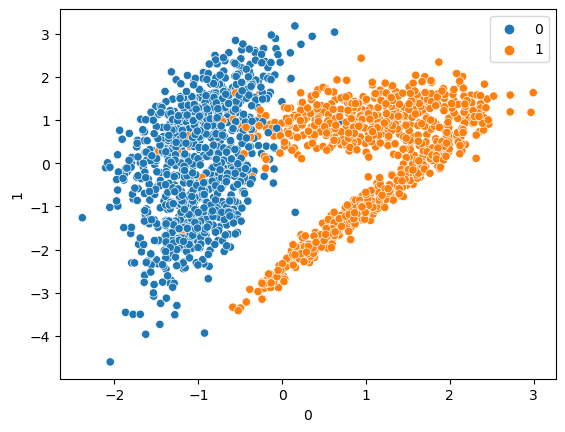

In [6]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [9]:
from sklearn.svm import SVC

In [10]:
model = SVC(kernel='linear')

In [11]:
model.fit(X_train,y_train)

SVC(kernel='linear')

In [12]:
model.coef_

array([[ 2.94243135, -0.38473277]])

In [13]:
y_pred = model.predict(X_test)

In [14]:
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,

In [15]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [16]:
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
acs = accuracy_score(y_test,y_pred)

print("Confusion matrix: \n",cm)
print('Classification report: \n',cr)
print('Accuracy Score: ',acs)

Confusion matrix: 
 [[252   2]
 [ 11 235]]
Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       254
           1       0.99      0.96      0.97       246

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500

Accuracy Score:  0.974


### Hyperparameter Tuning

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
params = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear']
              }

svc = SVC()

In [19]:
 clf = GridSearchCV(svc,param_grid=params,refit=True,cv=5,verbose=2)

In [20]:
clf.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, 

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=2)

In [21]:
clf.best_estimator_

SVC(C=0.1, gamma=1, kernel='linear')

In [22]:
clf.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [23]:
y_pred = clf.predict(X_test)

In [24]:
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
acs = accuracy_score(y_test,y_pred)

print("Confusion matrix: \n",cm)
print('Classification report: \n',cr)
print('Accuracy Score: ',acs)

Confusion matrix: 
 [[253   1]
 [ 12 234]]
Classification report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       254
           1       1.00      0.95      0.97       246

    accuracy                           0.97       500
   macro avg       0.98      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500

Accuracy Score:  0.974
